# Implementacion Perceptron en Python
En este notebook, implementaremos un perceptrón para resolver un problema de clasificación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de Datos

In [4]:
df = pd.read_csv('datos-enc.csv', sep=';')

In [6]:
df

,Tiempo Soleado,Tiempo Nublado,Temperatura Calor,Temperatura Frio,Humedad Alta,Viento Debil,Juega Tenis
0,1,0,1,0,1,1,0
1,1,0,1,0,1,0,0
2,0,1,1,0,1,1,1
3,0,0,0,0,1,1,1
4,0,0,0,1,0,1,1
5,0,0,0,1,0,0,0
6,0,1,0,1,0,0,1
7,1,0,0,0,1,1,0
8,1,0,0,1,0,1,1
9,0,0,0,0,0,1,1


### Formulación del Modelo

In [9]:
# Matriz de Features
X = df.drop(columns="Juega Tenis").values

# Variable objetivo
y = df["Juega Tenis"].values

In [11]:
# Define una función que calcule el producto punto entre dos vectores:
def dot_product(x, w):
    return np.dot(x, w)


In [13]:
# Define la función de activación. 
def activation(x):
    return 1 if x >= 0 else 0

In [15]:
# Define la función de entrenamiento del perceptrón:
def perceptron_train(X, y, num_epochs, learning_rate):
    weights = np.random.rand(X.shape[1])

    errors = []
    
    # iterar las epocas
    for epoch in range(num_epochs):
        epoch_error = 0
        # Itera sobre todos los ejemplos de entrenamiento 
        for i in range(X.shape[0]):
            # Calcula la salida del perceptrón
            output = activation(dot_product(X[i], weights))
            # Actualiza los pesos si la salida es incorrecta 
            if output != y[i]:
                error = y[i] - output
                weights += learning_rate * error * X[i] 
                epoch_error += abs(error)
                
        errors.append(epoch_error)
    return weights, errors
    

In [17]:
# Ahora puedes utilizar la función perceptron_train para entrenar el perceptrón con tus datos de entrenamiento:
# En este ejemplo, utilizamos los datos de entrenamiento X y y para entrenar el perceptrón durante 100 épocas, 
# con una tasa de aprendizaje de 0.1. 
# La función devuelve los pesos entrenados y los errores computados en cada epoch
weights, errors = perceptron_train(X, y, num_epochs=30, learning_rate=0.1)
print(weights)
print(errors)

[-0.06161219  0.48624311 -0.07911363 -0.06952182 -0.37442427  0.3732161 ]
[5, 4, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [19]:
# estos son los pesos calculados
weights

array([-0.06161219,  0.48624311, -0.07911363, -0.06952182, -0.37442427,
        0.3732161 ])

## Haciendo Predicciones

In [22]:
# Para hacer predicciones con el perceptrón entrenado, utilizamos la siguiente función:
def perceptron_predict(x, weights):
    return activation(dot_product(x, weights))

In [24]:
# Puedes utilizarla para predecir la salida de un ejemplo dado:
x = np.array([0, 1, 0, 0 ,1, 0])
prediction = perceptron_predict(x, weights)
print(prediction) 

1


## Evaluando el desempeño

In [27]:
# hacemos predicciones sobre el set X, por simplicidad no haremos cross validation, 
# pero debieramos siempre
y_pred = [perceptron_predict(x, weights) for x in X]
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]

In [29]:
# calculamos el accuracy
sum(y_pred == y) / len(y)

0.8571428571428571

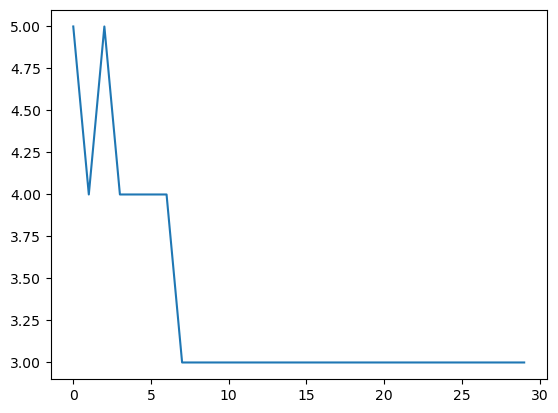

In [33]:
# graficamos los errores en cada epoch
plt.plot(errors)